# **IMPORT LIBRARIES**

In [13]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **IMPORT DATA, TEST/TRAIN SPLIT, SCALE**

In [2]:
features = pd.read_csv('../data/paris_lille/geometric_features.csv')
X = features.drop(['class'], axis=1)
y = features[['class']].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y)

# **BASE MODEL**

In [3]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.700     0.500     0.583        14
           Bench      0.000     0.000     0.000         6
    Bicycle Rack      0.000     0.000     0.000         6
Bicycle Terminal      0.000     0.000     0.000         5
         Bollard      0.000     0.000     0.000        71
        Building      0.276     0.727     0.400        11
           Chair      0.000     0.000     0.000         2
Distribution Box      0.000     0.000     0.000        11
      Floor Lamp      0.000     0.000     0.000        27
          Island      0.000     0.000     0.000         3
Lighting Console      0.000     0.000     0.000        39
        Low Wall      0.158     0.176     0.167        17
         Mailbox      0.000     0.000     0.000         1
           Meter      0.000     0.000     0.000         1
      Mobile Car      0.000     0.000     0.000         5
      Mobile Van      0.000     0.000     0.000         1
         Natu

# **HYPERPARAMETER TUNING**

In [7]:
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

params_grid = {
    'solver' : solvers,
    'penalty' : penalty,
    'C' : c_values
}

In [8]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=cv, scoring='f1_micro')
search_results = grid_search.fit(X_train, y_train)

In [9]:
search_results.best_estimator_

LogisticRegression(C=10, solver='newton-cg')

In [14]:
best_model = search_results.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.889     0.571     0.696        14
           Bench      0.000     0.000     0.000         6
    Bicycle Rack      0.000     0.000     0.000         6
Bicycle Terminal      0.000     0.000     0.000         5
         Bollard      0.719     0.901     0.800        71
        Building      0.875     0.636     0.737        11
           Chair      0.000     0.000     0.000         2
Distribution Box      1.000     0.182     0.308        11
      Floor Lamp      0.833     0.741     0.784        27
          Island      1.000     0.333     0.500         3
Lighting Console      0.425     0.436     0.430        39
        Low Wall      0.833     0.294     0.435        17
         Mailbox      0.000     0.000     0.000         1
           Meter      0.000     0.000     0.000         1
      Mobile Car      0.000     0.000     0.000         5
      Mobile Van      0.000     0.000     0.000         1
         Natu

# **CONFUSION MATRIX**

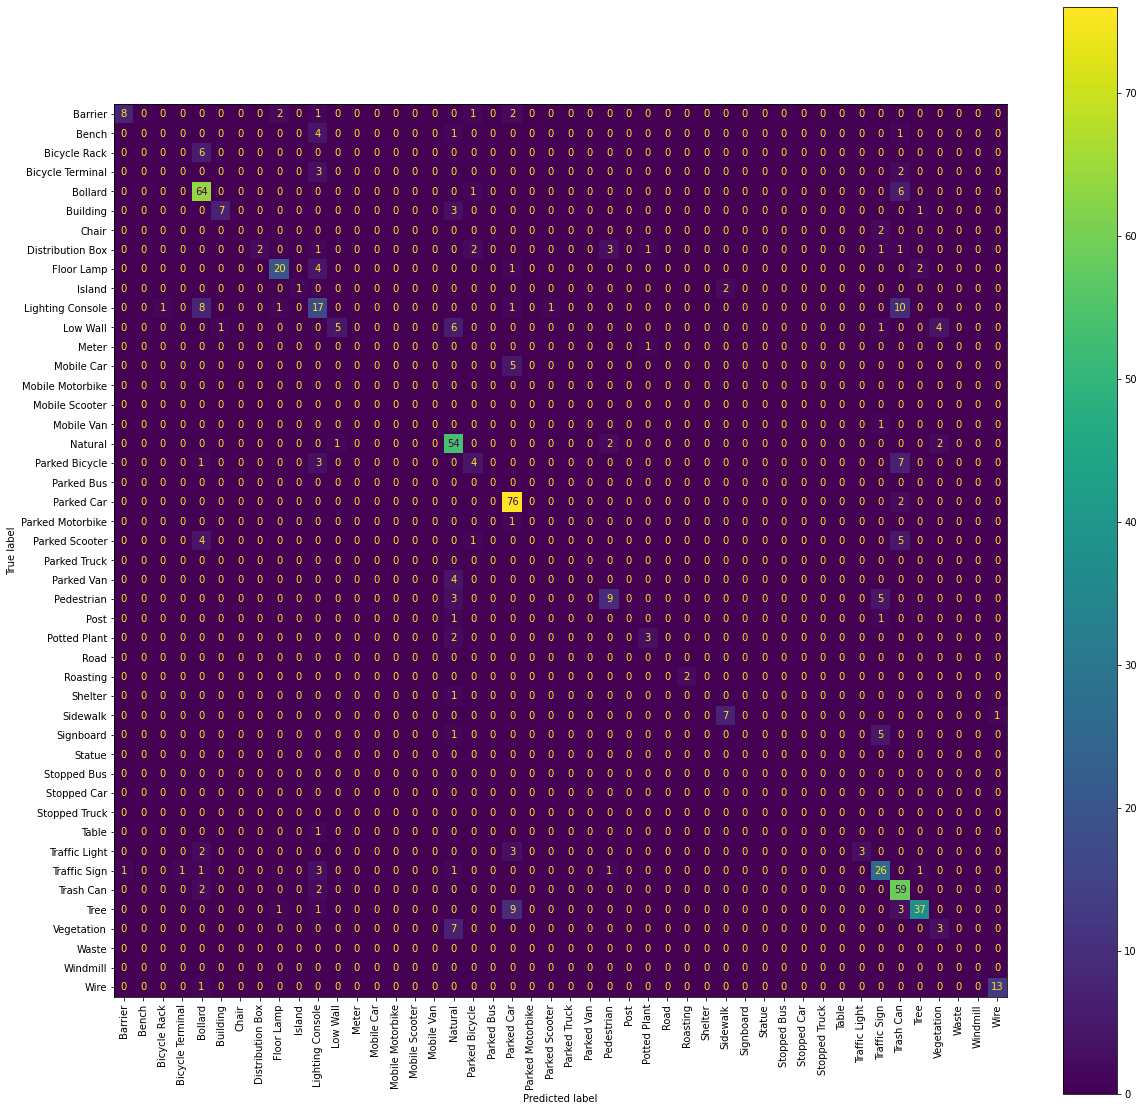

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cmd.plot(ax=ax, xticks_rotation='vertical');

plt.savefig('confusionmatrix_lr.png', dpi=600)